> 数学以及其他理论的学习：概念，定义，计算，coding

- 多元变量微积分（Multivariate Calculus）
- 梯度下降参考：https://www.bilibili.com/video/BV1ga4y1i75Q/?spm_id_from=333.999.0.0

In [28]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

## derivative

- rate of change of function，刻画函数的变化率情况；

## partial derivative

$$
f(x,y)
$$

- only affect one variable
    - $\frac{\partial f}{\partial x}$: 函数在X轴方向（$u=(1,0)$）左右变化的速度；
    - $\frac{\partial f}{\partial y}$: 函数在Y轴方向（$u=(0,1)$）左右变化的速度；

## directional derivatives

- 方向导数是一个数（scalar），用于计算任意方向（$\vec u$）上的导数
- 我们可以从其极限定义形式出发，推导出内积计算形式
    - 多元函数的一阶泰勒展开；

$$
\begin{split}
D_u(f(x_0,y_0))&=\lim_{h\rightarrow 0}\frac{f(x_0+hu_1,y_0+hu_2)-f(x_0,y_0)}{h}\\
&\approx\frac{f(x_0,y_0)+hu_1f_x(x_0,y_0)+hu_2f_y(x_0,y_0) - f(x_0,y_0)}{h}\\
&=u_1f_x(x_0,y_0) + u_2f_y(x_0,y_0)\\
&=\nabla f(x_0,y_0)\cdot u
\end{split}
$$


- 这里我们可以看到在 $x$/$y$ 轴方向的偏导数是方向为 $u=(1, 0)/u=(0, 1)$ 的方向导数的特例；

### directional derivatives & gradient vector

- gradient vector：长度 & 方向

$$
\nabla f=\left(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}\right)
$$

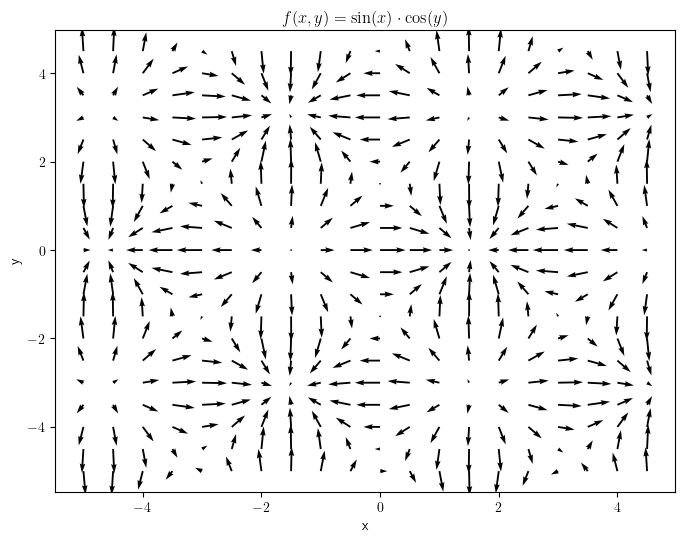

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x, y):
    return np.cos(x) * np.cos(y), -np.sin(x) * np.sin(y)

# Create a grid of points
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)

# Calculate the derivatives at each point
U, V = f(X, Y)

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
_ = plt.title(r'$f(x, y) = \sin(x) \cdot \cos(y)$')

In [48]:
f(0, 0)

(1.0, -0.0)

### 方向导数与梯度方向

- 显然从方向导数的计算公式，可以看出，方向 $\vec u$ 与该点的梯度方向 $\nabla f(x_0,y_0)$一致时（夹角为 0），方向导数为最大（一定为正值）；
    
    - $\vec u$ 与梯度 $\nabla f$ 成锐角时，方向导数为正，表示函数在这个方向增加
        - 梯度方向，函数上升的方向；
    - $\vec u$ 与梯度 $\nabla f$ 成直角时，方向导数为0，表示在这个方向上函数值不变
    - $\vec u$ 与梯度 $\nabla f$ 成钝角时，方向导数为负，表示函数在这个方向减少
        - 负梯度方向，函数下降的方向；（梯度下降优化方法的一个理论基础）
- 关于方向导数的计算式（也就是内积），可以从投影的角度来理解；

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Gradient of f at point (1,1)
gradient = np.array([2, 2])

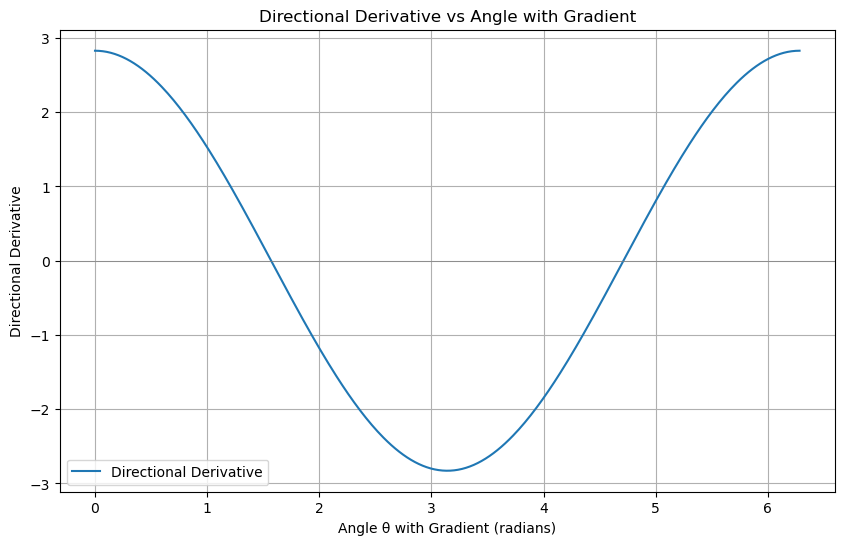

In [8]:
# Assuming the gradient at point (1,1) is [2, 2] as before
# We normalize this gradient vector for our calculations
normalized_gradient = gradient / np.linalg.norm(gradient)

# Recompute directional derivatives with the new definition of theta
new_directional_derivatives = []

angles = np.linspace(0, 2 * np.pi, 360)
for theta in angles:
    # Direction vector u(theta) relative to the gradient vector
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                                [np.sin(theta),  np.cos(theta)]])
    u_rotated = np.dot(rotation_matrix, normalized_gradient)
    
    # Directional derivative D_u(theta)f
    directional_derivative = np.dot(gradient, u_rotated)
    new_directional_derivatives.append(directional_derivative)

# Plotting the new graph
plt.figure(figsize=(10, 6))
plt.plot(angles, new_directional_derivatives, label="Directional Derivative")
plt.xlabel("Angle θ with Gradient (radians)")
plt.ylabel("Directional Derivative")
plt.title("Directional Derivative vs Angle with Gradient")
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.grid(True)


In [17]:
np.pi

3.141592653589793